# 制御フロー

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [257]:
# 警告メッセージを非表示
import warnings
warnings.filterwarnings("ignore")

制御フロー（control flow）とは，コンピューターがコードを実行する順序を意味する。通常，コードセルの中では「上から下に」実行することになるが，その中でフローが条件分岐したり，ある作業を何百回・何万回も繰り返したりすることになる。ここでは条件分岐と繰り返しに注目し`Python`の使い方を説明する。

## フローチャート

本題に入る前に，まずフローチャートについて説明する。フローチャートを使うと，より直観的に制御フローを理解することができるだろう。フローチャートとは，コードの実行やプログラムの処理の流れ（順番）を示す図である。非常に簡単で，見れば直ぐに理解できる便利なツールである。次のコードを考えてみよう。

In [258]:
x = 10      #1
y = x + 5   #2
print(y)    #3

15


このコード・セルを実行すると上から順に次のように実行される。
* `#1`の行：`10`を変数`x`に割り当てる。
* `#2`の行：`#1`が終わった後に，`x`の値と`5`を足し合わせ変数`y`に割り当てる。
* `#3`の行：`#2`が終わった後に，`y`の値を`print()`関数を使い表示する。

この流れをフローチャートに表してみよう。

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


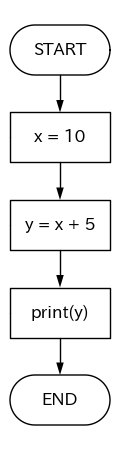

In [2]:
from schemdraw import flow
import schemdraw
import japanize_matplotlib

schemdraw.config(lw=1, font='IPAexGothic')
with schemdraw.Drawing() as d:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(d.unit/4)
    h = flow.Box(w=2, h=1).label('x = 10')
    flow.Arrow().down(d.unit/4)
    h = flow.Box(w=2, h=1).label('y = x + 5')
    flow.Arrow().down(d.unit/4)
    h = flow.Box(w=2, h=1).label('print(y)')
    flow.Arrow().down(d.unit/4)
    flow.Start(w=2, h=1).label('END')

一番最初と最後の楕円は，プログラムの始まり（`START`）と終わり（`END`）を表す。長方形はコードの処理，そして，矢印はプログラムの実行の順番（フロー）を意味する。単純な例なので，上から下に一直線の実行フローとなっている。より複雑なコードの場合，矢印が横向きや上向きになったりもし，枠も様々な形を使い実行フローを表現することになる。以下では，枠は次の３種類だけを使い制御フローをシンプルな形で表すことにする。
* 楕円（端子）：プログラムの始まりと終わり
* 長方形（処理）：コードの処理
* 菱形（判断）：条件分岐

また，矢印に`True`や`False`等を付け加えて条件分岐を表現することになる。

## `if`文

### 説明と簡単な例

`if`文を使うと，指定した条件によって処理を複数パターンに分けることができる。条件をブール型（真偽）（`True`又は`False`）で判断しコードを実行することになる。次の構文となる。

```
if ＜条件１＞:
    ＜条件１が`True`の場合に実行するコード＞
    
elif ＜条件２＞:
    ＜条件２が`True`の場合に実行するコード＞
    
elif ＜条件３＞:
    ＜条件３が`True`の場合に実行するコード＞
    ....
else:
    ＜全ての条件が`False`の場合に実行するコード＞
```
* １行目は`if`で始まり`:`で終わる。
* `＜条件...がTrueの場合に実行するコード＞`の行はインデント（４つの半角スペース）されている。
* `elif`（else ifの略）の行も`:`で終わる。
* `else`の行も`:`で終わる。
* 条件が１つの場合は，`elif`がある行を書く必要はない。
* `else`の行は省略可能。その場合は，次のコードと等しい。
    
    ```
    else:
        pass
    ```
  即ち，「全ての条件が`False`の場合は何も実行しない」という意味になる。

条件が１つの例を考えよう。

In [260]:
x = 10                       #1

if x == 10:                  #2
    print('条件はTrueです')    #3

else:                        #4
    print('条件はFalseです')   #5

条件はTrueです


＜コードのの説明＞
* `#1`：`10`を`x`に割り当てる。
* `#2`：`x`が`10`と等しいかを判断する。
     * `x==10`が`True`の場合は，`#3`が実行され，`条件はTrueです`が表示さる。コード・セルの実行はこれで終了する。
     * `x==10`が`False`の場合は，`#3`は実行されず，`#4`に進む。
* `#4`から`x==10`が`False`のケースがはじまる。
* `#5`が実行され，`条件はFalseです`が表示さる。コード・セルの実行はこれで終了する。

もちろん，上のコード・セルを実行すると，`#3`で処理は終了することになる。この`if`文をフローチャートで表してみよう。

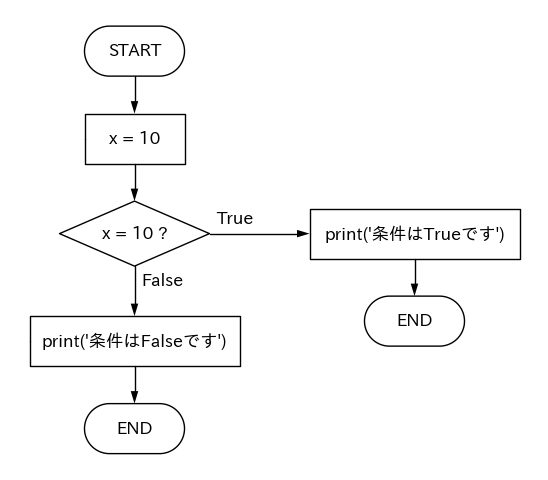

In [261]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    
    b = flow.Box(w=2, h=1).label('x = 10')
    flow.Arrow().down(sd.unit/4)
    
    d = flow.Decision(w=3, h=1.3, S='False', E='True').label('x = 10 ?').drop('S')
    
    flow.Arrow().right().at(d.E).length(2)
    b = flow.Box(w=4.2, h=1).label("print('条件はTrueです')").drop('S')
    flow.Arrow().down(sd.unit/4)
    flow.Start(w=2, h=1).label('END')
    
    flow.Arrow().down(sd.unit/3).at(d.S)
    b = flow.Box(w=4.2, h=1).label("print('条件はFalseです')")
    flow.Arrow().down(sd.unit/4)
    flow.Start(w=2, h=1).label('END')

菱形枠中の`？`は「判断」を意味するが，上のコードの`#2`に対応している。`x=10`は`True`なので，菱形枠から右に移動して`条件はTrueです`が表示されることになる。

次の例は上の例と似ているが少しだけ異なる。

In [262]:
x = 20                        #1

if x == 10:                   #2
    print('条件はTrueです')    #3

else:                         #4
    pass                      #5

＜コードの文の説明＞
* 上の`if`文と異なるのは`#5`だけである。`pass`は「何もしない」という意味。

`20`が`x`に割り当てられているので，`x==10`は`False`を返す。従って，`#3`は飛ばして`else`のブロックに移ることになる。その場合の実行コードは`pass`なので何も表示されないことになる。

このコードで`else`以下を省略してもエラーにはならない（結果も変わらない）。即ち，`else`以下がない場合は，`#3`と`#4`が省略されていると考えることができる。

フローチャートで表すと次のようになる。

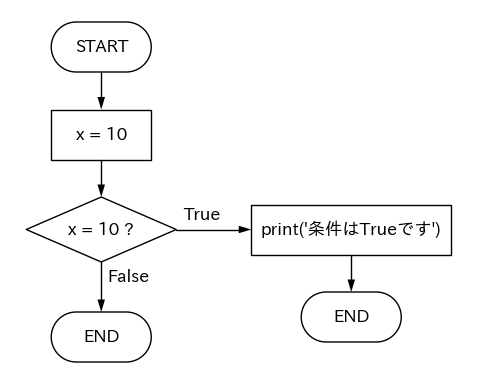

In [263]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    
    b = flow.Box(w=2, h=1).label('x = 10')
    flow.Arrow().down(sd.unit/4)
    
    d = flow.Decision(w=3, h=1.3, S='False', E='True').label('x = 10 ?').drop('S')
    flow.Arrow().right().at(d.E).length(1.5)
    flow.Box(w=4, h=1).label("print('条件はTrueです')").drop('S')
    flow.Arrow().down(sd.unit/4)
    flow.Start(w=2, h=1).label('END')
#     flow.Start(w=2, h=1).anchor('W').label('END')
    
    flow.Arrow().down(sd.unit/3).at(d.S)
    flow.Start(w=2, h=1).label('END')

`False`と判断されると，直ぐに`END`となっている。

### 複数条件

次に，複数の条件がある例を考える。`change_in_gdp`をGDPの変化として，次の表示がされる`if`文を作成する。

1. `change_in_gdp`の値が正の場合，`GDPは増加`を表示する。
1. `change_in_gdp`の値が負の場合，`GDPは減少`を表示する。
1. `change_in_gdp`の値が`0`の場合，`GDPは不変`を表示する。

`change_in_gdp`の値が`200`として，フローチャートで表すと次のようになる。

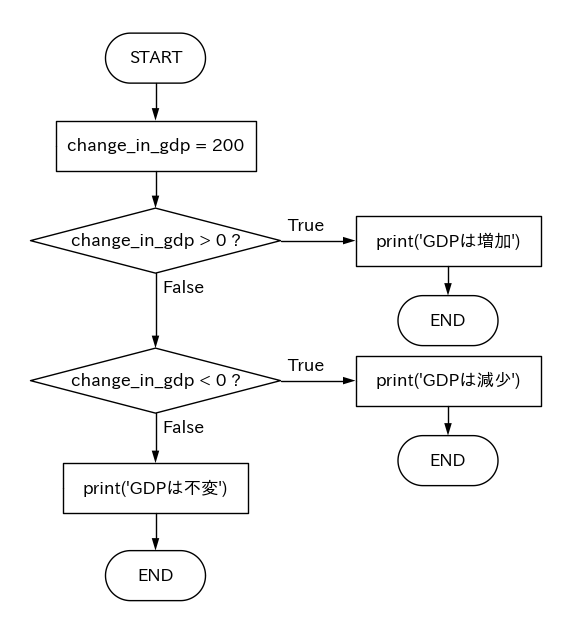

In [264]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    b = flow.Box(w=4, h=1).label('change_in_gdp = 200')
    flow.Arrow().down(sd.unit/4)
    d = flow.Decision(w=5, h=1.3, S='False', E='True'
                     ).label('change_in_gdp > 0 ?')
    
    flow.Arrow().right().at(d.E).length(1.5)
    b = flow.Box(w=3.7, h=1.).label("print('GDPは増加')").drop('S')
    flow.Arrow().down(sd.unit/5)
    flow.Start(w=2, h=1).label('END')
    
    flow.Arrow().down(sd.unit/2).at(d.S)
    d = flow.Decision(w=5, h=1.3, S='False', E='True'
                 ).label('change_in_gdp < 0 ?')

    flow.Arrow().right().at(d.E).length(1.5)
    b = flow.Box(w=3.7, h=1.).label("print('GDPは減少')").drop('S')
    flow.Arrow().down(sd.unit/5)
    flow.Start(w=2, h=1).label('END')

    flow.Arrow().down(sd.unit/3).at(d.S)
    b = flow.Box(w=3.7, h=1.).label("print('GDPは不変')").drop('S')
    flow.Arrow().down(sd.unit/4)
    flow.Start(w=2, h=1).label('END')

このフローチャートをコードに落とし込むと次のようになる。

In [265]:
change_in_gdp = 200  #1

if change_in_gdp > 0:
    print('GDPは増加')

elif change_in_gdp < 0:
    print('GDPは減少')

else:
    print('GDPは不変')

GDPは増加


＜`if`文の説明＞
* `if`が１つ目の条件, `elif`が２つ目の条件, `else`が３つ目の条件を指定している。
* `if`, `elif`, `else` で始まる行の最後は`:`となる。
* `print` で始まる行には4つの半角スペースのインデントが入る
* `else`の行に`change_in_gdp==0`は不要（残りの可能性は`change_in_gdp==0`しかないため）
* `elif`は`else if`の省略形であり，２つ目の条件を定義する。
* `elif`は`if`と`else`の間に複数入れることが可能である。

コードを実行すると，`#1`で`200`が`change_in_gdp`割り当てられているので`GDPは増加`が表示されることになる。

このコードを次のように入れ子の`if`文として書くことも可能である。

In [266]:
change_in_gdp = 200

if change_in_gdp > 0:               #1
    print('GDPは増加')

else:                               #2
    if change_in_gdp < 0:           #3
        print('GDPは減少')

    else:                           #4
        print('GDPは不変')

GDPは増加


＜`if`文の説明＞
* `#1`と`#2`を使って`0`で条件分岐させている。
    * `#1`：`change_in_gdp`が正であれば`GDPは増加しています。`が表示される。
    * `#2`：`change_in_gdp`が非正の場合は次の条件分岐に進む。
* `#3`と`#4`を使って，`0`で条件分岐させている。
    * `#3`：`change_in_gdp`が負であれば`GDPは減少しています。`が表示される。
    * `#4`：`change_in_gdp`が`0`であれば`GDPは変化していません。`が表示される。
    
このコードを見ると，複数条件の場合に使う`elif`は`else if`の略だと気づくはずだ。またコードを読んで感じることは，入れ子にすると可読性が落ちることだ。複数条件の場合は，`elif`を使うようにしよう！

### 関数化

`if`文は関数の中で使うことも可能である。GDPに関する例を使って考えてみよう。

In [267]:
def gdp_change(change_in_gdp):
    
    if change_in_gdp > 0:
        print('GDPは増加')

    elif change_in_gdp < 0:
        print('GDPは減少')

    else:
        print('GDPは不変')

＜関数の説明＞
* 引数が`change_in_gdp`
* `return`がないので返り値はなく，単に`print()`関数で表示をするだけとなる。
* `if`，`elif`，`else`の行は4つの半角スペースのインデントが入っている。
* `print`の行は8つの半角スペースのインデントが入っている。

In [268]:
gdp_change(200)

GDPは増加


In [269]:
gdp_change(-200)

GDPは減少


In [270]:
gdp_change(0)

GDPは不変


### 直接真偽値を使う

`if`文を実行する上で，条件が真偽値`True`又は`False`を返すかで制御フローが分岐することが分かったと思う。ここで真偽値が重要な役割を果たしているが，`bool()`関数を使って真偽値をできることを思い出そう。空の文字列`''`や`0`などは「空」・「無」なので`False`となるが，それら以外は`True`となる。次の例はこの特性を使った例となる。

In [271]:
def truth_value(x):

    if x:   # この行に着目
        print('真偽値はTrueです。')

    else:
        print('真偽値はFalseです。')

このコードで着目してほしいのは`if x:`の行である。引数`x`自体が条件文になっている。もし引数に文字列`abc`が使われると，`if 'abc':`となり，エラーが発生するのではと思うかも知れないが，そうならない。実は`if`文の場合，下の左と右のコードは同じなのである。
```
if x:　→　if bool(x):
```
この解釈はどの`if`文でも成立するので覚えておこう。

In [272]:
truth_value('経済学')

真偽値はTrueです。


In [273]:
truth_value('0')

真偽値はTrueです。


In [274]:
truth_value(0)

真偽値はFalseです。


真偽値を使ったもう１つの例を紹介しよう。

In [275]:
def my_wallet(money_in_my_wallet):
    
    if money_in_my_wallet:   #1
        print('なに買おうかな😄')
    
    else:
        print('一文なしだよ😅')

実行してみよう。

In [276]:
my_wallet(0)

一文なしだよ😅


＜`#1`の`if money_in_my_wallet:`について＞
* `if money_in_my_wallet != 0`と同じである。だが`if money_in_my_wallet:`の方がより簡単で`Python`的（Pythonic）だと言える。
* `if money_in_my_wallet:`は「もしお財布にお金があれば」と読めるため，より直感的でもある。

### 数値を返す例

今までの例では`print()`関数を使ったが，もちろん数値を返す`if`文を書くことも可能であり，むしろそれが一般的だろう。次の関数を考えてみよう。

$$
y = \left|x\right|
$$

まず，フローチャートを考えてみる。

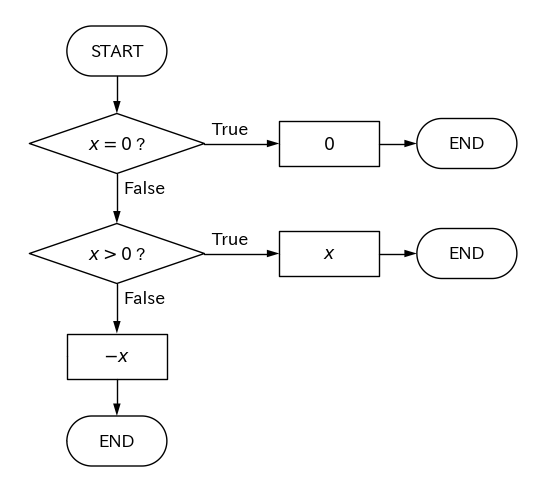

In [277]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    
    d = flow.Decision(w=3.5, h=1.2, S='False', E='True'
                     ).label(r'$x=0$ ?')
    
    flow.Arrow().right().at(d.E).length(1.5)
    flow.Box(w=2., h=0.9).label(r'$0$')
    flow.Arrow().right(sd.unit/4)
    flow.Start(w=2, h=1).label('END').anchor('W')
    
    flow.Arrow().down().at(d.S).length(1.)
    d = flow.Decision(w=3.5, h=1.2, S='False', E='True'
                     ).label(r'$x>0$ ?')
    
    flow.Arrow().right().at(d.E).length(1.5)
    flow.Box(w=2., h=0.9).label(r'$x$')
    flow.Arrow().right(sd.unit/4)
    flow.Start(w=2, h=1).label('END').anchor('W')
    
    flow.Arrow().down(sd.unit/3).at(d.S)
    flow.Box(w=2, h=0.9).label(r'$-x$').drop('S')
    flow.Arrow().down(sd.unit/4)
    flow.Start(w=2, h=1).label('END')

ここでは，まず $x=0$ が`True`か`False`かを判断し，次に $x>0$ が`True`か`False`かを判定している。しかし，図から分かるように，この２つの判断は，非常に似ており，次のように１つにまとめることができる。

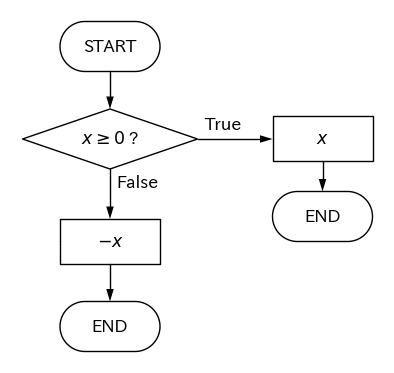

In [278]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    
    d = flow.Decision(w=3.5, h=1.2, S='False', E='True'
                     ).label(r'$x\geq 0$ ?').drop('S')
    
    flow.Arrow().right().at(d.E).length(1.5)
    b = flow.Box(w=2., h=0.9).label(r'$x$').drop('S')
    flow.Arrow().down(sd.unit/5)
    flow.Start(w=2, h=1).label('END')
    
    flow.Arrow().down(sd.unit/3).at(d.S)
    b = flow.Box(w=2, h=0.9).label(r'$-x$').drop('S')
    flow.Arrow().down(sd.unit/4)
    flow.Start(w=2, h=1).label('END')

このフローチャートに従って，`if`文を使いコードを書いてみよう。

In [279]:
x = -10       # 0

if x >= 0:    # 1
    y = x
    
else:         # 2
    y = -x
        
y             # 3

10

＜`if`文の説明＞
* (`#1`) `x`が非負であれば，`x`が`y`に割り当てられる。
* (`#2`) `x`が負であれば，`-x`が`y`に割り当てられる。

`#0`で`-10`が`x`に割り当てられているので，`#3`の`y`には`10`が割り当てられている。従って，`y`を実行すると`10`が表示されることになる。

次に，この`if`文を関数にまとめてみよう。

In [280]:
def f(x):
    
    if x >= 0:
        y = x
        return y

    else:
        y = -x
        return y

上の`if`文との主な違い：
* `x`を引数に使う。
* 関数の戻り値を設定するために`return y`が追加されている。

更に，短くするには次のように書くこともできる。

In [281]:
def f(x):
    
    if x >= 0:
        return x

    else:
        return -x

違いは変数`y`を使わずに，直接結果を返している。

In [282]:
f(10), f(-10), f(0)

(10, 10, 0)

---
経済学の例として一般的な生産関数を考えよう。

$$
Y=F(K,L)
$$

要素間の代替の弾力性は次のように定義される。

$$
\sigma = 
\dfrac{d\log(L/K)}{d\log\left(\frac{dF}{dK}/\frac{dF}{dL}\right)}
$$

$\sigma$が一定な生産関数はCES生産関数（Constant Elasticity of Substitution）と呼ばれ，次の式で与えられる。

$$
Y = A\left[a(bK)^\rho+(1-a)(cL)^\rho\right]^{\frac{1}{\rho}}
$$

ここで
* $\sigma=\dfrac{1}{1-\rho}$
* $\rho\leq 1$：要素の代替の程度を決定する。
* $0<a<1$：要素の貢献度のシェアを決定する。
* $b>0,c>$：要素の単位に依存する。
* $A>0$：生産の単位に依存する（生産性）。

また，$\rho$の値によって次のような生産関数となる。

$$
Y = 
\begin{cases}
    &A\left[a bK+(1-a)cL\right],\quad\rho=1\quad \text{（完全代替型）}\\
    &AK^a L^{1-a},\quad\rho=0\quad\text{（コブ・ダグラス型）}\\
    &A\cdot\text{min}\left\{bK, cL\right\},\quad\rho=-\infty\quad\text{（完全補完型またはレオンティエフ型）}
\end{cases}
$$

次のコードでは，$\rho=-\infty$以外のケースを関数で表している。

In [283]:
def ces_production(k, l, rho=0, A=1, a=0.3, b=1, c=1):
    
    if rho > 1:
        print('rhoには１以下の数字を入力してください。')

    elif rho == 1:
        return A*( a*b*k + (1-a)*c*l )
    
    elif rho == 0:
        return A*k**a * l**(1-a)
    
    else:
        return A*( a*(b*k)**rho + (1-a)*(c*l)**rho )**(1/rho)

In [284]:
ces_production(10, 3, rho=-1)

3.79746835443038

## `for`ループ

### 説明

ループとは同じコードを複数回続けて実行できるように書かれたコードを指す。ループには２つのタイプがあるが，`for`ループは指定した回数だけ処理を繰り返す計算手続きである。次のような書き方となる。

```
for ＜イタラブルの要素を割り当てる変数＞ in ＜イタラブル＞:
    ＜毎回実行したいコード＞
```

* 1行目
    * `＜イタラブル＞`（iterable）とはリストやタプルのように要素を１つずつ返すことができる反復可能なデータ型（オブジェクト）を指す。文字列や後に説明する`Numpy`の`array`も含まれる。
    * `＜イタラブルの要素を割り当てる変数＞`とはループを１回実行する毎に`＜イタラブル＞`の要素の値を割り当てる変数のこと。よく`i`や`j`などが使われ，再割り当てされても問題がない変数名を使おう。
    * `for`で始まり`:`で終わり，`＜イタラブル＞`の前に`in`が入る。
* 2行目以降
    * 慣例では4つの半角スペースのインデント後に毎回実行したいコードを書く。

```{note}
`for`ループでは無限ループは発生しない。リストなどのイタラブルの最後の要素が使われると，自動でループが終了する仕様となっている。
```

以下では例を使って説明しよう。

### `print()`を使う例

次のリストにはGDPの構成要素が並んでいる。

In [285]:
gdp_components = ['消費', '投資', '政府支出', '純輸出']

このリストにある文字列を表示したいとしよう。

In [286]:
for i in gdp_components:
    
    print(i)

消費
投資
政府支出
純輸出


＜コードの説明＞
* １回目のループ
    * 1行目で`gdp_components`の0番目の要素`消費`を`i`に割り当てる。
    * 2行目で`print()`関数を使い変数`i`の値を表示する。
* ２回目のループ
    * 1行目で`gdp_components`の1番目の要素`投資`を`i`に割り当てる。
    * 2行目で`print()`関数を使い変数`i`の値を表示する。
* ３回目のループ
    * 1行目で`gdp_components`の2番目の要素`政府支出`を`i`に割り当てる。
    * 2行目で`print()`関数を使い変数`i`の値を表示する。
* ４回目のループ
    * 1行目で`gdp_components`の最後の要素`純輸出`を`i`に割り当てる。
    * 2行目で`print()`関数を使い変数`i`の値を表示する。

この例では`gdp_components`の要素の数だけループが行われる。

言葉での説明をフローチャートで表すと次のようになる。

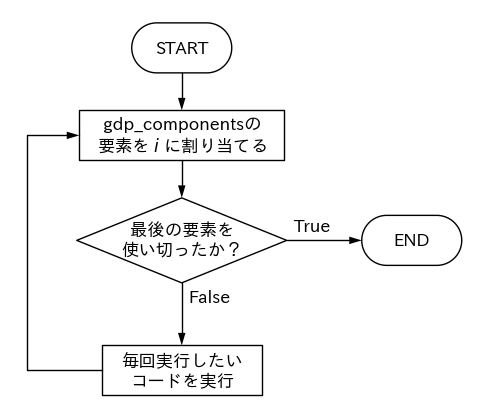

In [6]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    
    b1 = flow.Box(w=4.1, h=1).label('gdp_componentsの\n'r'要素を $i$ に割り当てる')
    flow.Arrow().down(sd.unit/4)
    
    d = flow.Decision(w=4.2, h=1.7, S='False', E='True'
                     ).label('最後の要素を\n使い切ったか？').drop('E')
    
    flow.Arrow().right(sd.unit/2)
    flow.Start(w=2, h=1).label('END').anchor('W')
    
    flow.Arrow().down(sd.unit/2.4).at(d.S)
    b2 = flow.Box(w=3.2, h=1).label('毎回実行したい\nコードを実行').drop('W')
    
    flow.Wire('c', k=-1.5, arrow='->').linewidth(1).to(b1.W)

この図から，`for`ループの裏では菱形の判断，即ち，`if`文が動いていることが分かる。`gdp_components`の最後の要素のループ処理が終わったかどうかを判断している。

```{hint}
上のフローチャートにある菱形は`if`文に対応すると説明したが，その点について補足説明をする。もう一度`gdp_components`を使った`for`ループを考えてみよう。次の２つの説明の内，一つは間違った説明であり，もう一つは正しい説明となる。
* 【間違った説明】
    * 最初のループで`消費`を変数`i`に割り当て，それが`gdp_components`の最後の要素である`純輸出`と等しいかを比べる。それに続くループでも，同様の比較をおこなう。変数`i`に`純輸出`が割り当てられると，`i`と`純輸出`は同じなので，`print(i)`を実行後に`for`ループを終了する。
* 【正しい説明】
    * 最初のループで`消費`を変数`i`に割り当て，`print(i)`を実行する。続くループでも同様の処理をおこなう。`純輸出`のループ処理が**終わった後**，更に次の要素を変数`i`に割り当てようとすると，「次の要素」は無いため`StopIteration`という「例外」（エラーに類似するもの）が発生し，その時点でループは終了する。即ち，フローチャートの菱形では，最後の要素を使い切った後に起こる`StopIteration`の「例外」が発生したかどうかを判断している。この特徴により，以下で説明する`while`ループよりも処理速度が速くなる。
```

### `.append()`を使う例

リストにはメソッド`.append()`が実装されており，これを使うとリストに値を追加することができる。`.append()`と`for`ループを使い，空のリストに値を追加し新たなリストを作成する方法を紹介する。まず元になるリストを作成しよう。

In [288]:
var_lst = [1,2,3,4,5]

以下では，`var_lst`のそれぞれの要素の10倍からなるリストを新たに作成する。

In [289]:
my_lst = []              # 1

for i in var_lst:        # 2
    
    x = 10 * i           # 3
    
    my_lst.append(x)     # 4

my_lst                   # 5

[10, 20, 30, 40, 50]

＜コードの説明＞

1. 空のリストの作成（`my_lst`に10倍にした数字を格納する）
2. ここから`for`ループの始まり。`i`はリスト`[1,2,3,4,5]`の要素を割り当てる変数。
    * １回目のループでは`i`に`1`を割り当てる。
    * ２回目のループでは`i`に`2`を割り当てる。
    * ３回目のループでは`i`に`3`を割り当てる。
    * ４回目のループでは`i`に`4`を割り当てる。
    * ５回目のループでは`i`に`5`を割り当てる。
3. `10*i`を計算し`x`に割り当てる。
1. `.append()`を使い`x`の値を`my_lst`に追加する。
1. `my_lst`を表示する。

このコードのフローチャートを書いてみよう！

### 消費関数

(sec:4-consumption)=
### 消費関数

`for`ループを使い，所得によって消費がどのように変化するかを考えてみよう。まず`y`を所得として消費関数を次のように仮定する。
```
消費 = 100 + 0.7 * y
```
ここで
* `100`：自発的消費（autonomous consumption）
    * 可処分所得がゼロであっても発生する消費支出
* `0.7`：限界消費性向（marginal propensity to consume）
    * 可処分所得が`1`単位増加した場合に，どれだけ消費が増えるかを示す。例えば，月給が`10,000`円増えたとすると，その場合，`7000`円を消費に支出することを意味する。

所得は次のリストで与えられるとする。

In [290]:
income_lst = [1000, 1100, 1500, 2000, 2300, 3000] 

In [291]:
c_lst = []               # 1

for y in income_lst:     # 2
    
    con = 100 + 0.7 * y  # 3
    
    c_lst.append(con)    # 4

c_lst                    # 5

[800.0, 870.0, 1150.0, 1500.0, 1710.0, 2200.0]

＜コードの説明＞

* `#1`：空のリストの作成（消費の値を格納する）
* `#2`： ここから`for`ループの始まり。`y`はリスト`income_lst`の要素を割り当てる変数。
    * １回目のループでは`y`に`1000`を割り当てる。
    * ２回目のループでは`y`に`1100`を割り当てる。
    * ３回目のループでは`y`に`1500`を割り当てる。
    * ４回目のループでは`y`に`2000`を割り当てる。
    * ５回目のループでは`y`に`2300`を割り当てる。
    * ６回目のループでは`y`に`3000`を割り当てる。
* `#3`：消費を計算し`con`に割り当てる。
* `#4`：`.append()`を使い`con`の値を`c_lst`に追加する。
* `#5`：`c_lst`を表示する。

### `for`ループの２つの書き方（動学分析の基礎）

上で説明した３つの`for`ループは次の特徴を持っている。
* `print()`を使った例
    * イタラブルの要素を使い，それを表示する。
* `.append()`を使った例
    * イタラブルの要素を使い，それを予め準備したリストに追加する。
* 消費関数の例
    * イタラブルの要素を使い消費を計算し，予め準備したリストに追加する。

３つに共通することは，`n`回目に計算した値は`n-1`回目に計算した値から独立だということである。例えば，消費関数を考えてみよう。３回目のループで計算した消費量はその回の所得に依存するが，２回目ループの消費量や所得には依存しない。`print()`と`.append()`の例も同じである。

一方，マクロ経済学では，今期の値は前期の値に依存する場合が頻繁に出てくる。典型的な例が資本ストックである。`t`期末の資本ストックは`t`期の投資と`t-1`期末の資本ストックによって決定される。ここでは，このように動的に変化する変数を捉えるための`for`ループの書き方を紹介するのが目的である。

投資と資本ストックはフローとストックの関係にあるが，お風呂の浴槽にバケツで水を足していくことをイメージすれば簡単に理解できるだろう。
* 浴槽に溜った水　→　資本ストック（ストックの概念）
* バケツの水　→　投資（フローの概念）

初期の資本ストック（浴槽の水）`0`であり，毎期ごと`10`単位の投資（`10`リットルのバケツで水を追加）するとしよう。問題を簡単にするために`5`期間（水を追加するのは`5`回）とする。資本ストック（浴槽の水量）の推移は次のリストで表すことができる。`for`ループを使って，このリストを作成することが目的である。

In [292]:
[10*i for i in range(5+1)]

[0, 10, 20, 30, 40, 50]

次のコードが一つ目の方法である。変数`k`を資本ストック，`#3`の`10`を投資，`t`を時間と考えればより分かり易いだろう。`k_lst`に資本ストックの時系列の値が格納されることになる。

In [293]:
k_lst = [0]               #1

for t in range(1,6):      #2
    
    k = k_lst[t-1] + 10   #3
    
    k_lst.append(k)       #4
    
k_lst                     #5

[0, 10, 20, 30, 40, 50]

＜コードの説明＞
* `#1`：`k_lst`に初期値の`0`が置いてある。以下では`k_lst`に値を追加して目的のリストを作成する。
* `#2`：ループの開始。
    * イタラブルとして`range(1,6)`を使っている。`list(range(1,6))`と置いても良いが，`range(1,6)`だけで役目は果たす。
    * `range(1,6)`は`1`から`5`までの整数を準備し，5回ループが実行されることになる。
    * `1`から`5`までの整数を順次`t`に割り当てることになる。
* １回目のループ
    * `#3`：`t=1`となる。`k_lst`の`0`番目の要素である`0`を抽出し，それに`10`をを足すことにより右辺は`10`となる。それを`k`に割り当てる。
    * `#4`：`k`の値`10`を`k_lst`に追加する。`10`は`k_lst`の1番目の要素となる。
* ２回目のループ
    * `#3`：`t=2`となる。`k_lst`の`1`番目の要素である`10`を抽出し，それに`10`をを足すことにより右辺は`20`となる。それを`k`に割り当てる。
    * `#4`：`k`の値`20`を`k_lst`に追加する。`20`は`k_lst`の2番目の要素となる。
* ３回目のループ
    * `#3`：`t=3`となる。`k_lst`の`2`番目の要素である`20`を抽出し，それに`10`をを足すことにより右辺は`30`となる。それを`k`に割り当てる。
    * `#4`：`k`の値`30`を`k_lst`に追加する。`30`は`k_lst`の3番目の要素となる。
* 同様のループ計算が合計で5回繰り返される。
* `#5`：`k_lst`を表示する。

この例では，ループ用の変数`t`が`#3`で使われており，比較的に分かりやすいと思う人も多いだろう。一方で，`t`に対応する変数（即ち，`k_lst[t-1]`）が何を指しているのかを考える必要があり少し煩雑と感じる人もいるだろう。

次のコードでも同じ結果となるが，`t`に対応する変数の値を考える必要はない。

In [294]:
k = 0                   #1

k_lst = [k]             #2

for t in range(5):      #3
    
    k = k + 10          #4
    
    k_lst.append(k)     #5
    
k_lst                   #6

[0, 10, 20, 30, 40, 50]

＜コードの説明＞
* `#1`：最初の`k`の値を設定する。また`k`はループのアップデート用の変数として使われる。
* `#2`：`k`の初期値`0`からなるリストの作成する。以下では`k_lst`に値を追加して目的のリストを作成する。
* `#3`：ループの開始。
    * イタラブルとして`range(5)`を使っている。`list(range(5))`と置いても良いが，`range(5)`で十分である。
    * `range(5)`は`0`から`4`までの整数を準備し，5回ループが実行されることになる。
    * `0`から`4`までの整数を順次`t`に割り当てることになる。
    * ４〜５行目に`t`は使われていない。従って，`t`の役割は`0`から`4`までの整数の「捨て場」のようなものである。そのような場合，`t`の代わりに`_`を使うこともある。
* １回目のループ
    * `#4`：右辺の`k`の値は`#1`で割り当てた`0`である。それに`10`を足し右辺は`10`となり，それを左辺の`k`に割り当てる。この時点で，１行目の`k=0`は「無効」となり，`k=10`として更新される。
    * `#5`：`k`の値`10`を`k_lst`に追加する。
* ２回目のループ
    * `#4`：右辺の`k`の値は`10`である。それに`10`を足し右辺は`20`となり，それを左辺の`k`に割り当てる。この時点で`k=10`は「無効」となり，`k=20`として更新される。
    * `#5`：`k`の値`20`を`k_lst`に追加する。
* ３回目のループ
    * `#4`：右辺の`k`の値は`20`である。それに`10`を足し右辺は`30`となり，それを左辺の`k`に割り当てる。この時点で`k=20`は「無効」となり，`k=30`として更新される。
    * `#5`：`k`の値`30`を`k_lst`に追加する。
* 同様のループ計算が合計で5回繰り返される。
* `#6`：`k_lst`を表示する。

１行目で`k=0`を設定していたが，ループ終了後の値を確認してみよう。

In [295]:
k

50

`k_lst`の最後の要素と同じであり，`for`ループ内で更新用の変数として使われたのがわかる。この点に関する注意点として[ここの箇所](sec:3-scope)を復習を勧める。

２つの書き方を紹介した。基本的にどちらを使っても良い。上でも書いたが，最初の方法は`t`に対応する変数の値を追う必要があるので，それを分かりやすいと感じる人もいるだろうし，面倒と感じる人もいるかも知れない。一方，２つ目の方法は`t`を確認する必要がない。もちろん，初期値の変数`k=0`を`for`ループの外に作る必要があるが，これは次の例で説明するように，関数の中で使う場合は問題にはならない。このサイトでは主に２つ目の手法を多用することになる。

次に上のコードを関数化してみよう。
初期時点の資本ストック`k0`と期間`period`を引数とする。

In [296]:
def capital_accumulation(k0, period):

    k = k0   # アップデート用の変数の生成

    k_lst = [k]

    for t in range(period):
        
        k = k + 10
        
        k_lst.append(k)

    return k_lst

capital_accumulation(0, 5)

[0, 10, 20, 30, 40, 50]

このコードでは`k=k0`でアップデート用の変数の生成している。実は，このコードをもう少し縮めることができる。

In [297]:
def capital_accumulation_shorter(k, period):

    k_list = [k]

    for t in range(period):
        k = k + 10
        k_list.append(k)

    return k_list

capital_accumulation_shorter(0, 5)

[0, 10, 20, 30, 40, 50]

`capital_accumulation`関数と`capital_accumulation_shorter`関数には２箇所違いがある。
* 後者では引数に`k`が使われている。
* 後者では`k=k0`の行がない。

後者の引数`k`が，初期値の設定とアップデート用変数の作成の２つの役割を同時に果たしている。`capital_accumulation(0,5)`を実行すると`k=0`が実行され，`0`が初期値に設定される。それと同時に，変数`k`がメモリー上に生成され，それがアップデート用の変数として使われることになる。

### 将来価値の時系列

(sec:4-future-values)=
### 将来価値の時系列

元本`x0`万円を投資すると実質年率`r`％の利息を得る金融商品を考えよう。`t`年後の将来価値（期首の値）をリストで示す関数を作成する。

In [298]:
def calculate_futre_value(x0, r, t):  #1
    
    x = x0                            #2
    
    value_lst = [x]                   #3
    
    for _ in range(t):                #4
        
        x = x*(1+r)                   #5
        
        value_lst.append(x)           #6
    
    return value_lst                  #7

＜コードの説明＞
* `#1`：引数
    * `x0`は元本，`r`実質利子率，`t`投資期間
* `#2`：`x`が`for`ループでのアップデート用の変数として使われる。初期値として元本`x0`を設定する。
* `#3`：`value_lst`に将来価値を追加して目的のリストを作成する。初期値の値である元本`x`がリストの0番目の要素として入っている。
* `#4`：`range(t)`を使って`0`から`t-1`までの整数を準備する。`_`は`0`から`t-1`までの値を割り当てるだけで他の役割はない。
* `#5`：右辺の`x`は今期の価値であり，来季の価値は`x*(1+r)`になる。それを左辺の`x`に割り当てる。その時点で`x`がアップデートされる。
* `#6`：`x`の値を`value_lst`に追加する。
* `#7`：戻り値として`value_lst`を設定する。

次の値を使って将来価値を計算してみよう。
* 元本：`x0=100`
* 実質利子率：`r=0.02`
* 期間：`t=5`

In [299]:
values = calculate_futre_value(100, 0.02, 5)
values

[100, 102.0, 104.04, 106.1208, 108.243216, 110.40808032000001]

このリストには初期値の`100`と`1`年後から`5`年後までの値が含まれている。

### `for`ループのお友達１：`enumerate()`関数

[将来価値の時系列](sec:4-future-values)の例を考えよう。結果はリストにまとめられているため，他に利用する場合は便利である。一方で，結果を見易く表示したい場合がある。その場合に便利なのが`enumerate()`関数である。

`enumerate()`ついて説明するために次のリストを考えよう。
```
['A','B']
```
`0`番目の要素は`A`，`1`番目の要素は`B`である。ここで`0`と`1`が要素インデックスである。`emunerate()`は次の2つをペアにしたイタラブルを返す。
* リストの要素インデックス
* 要素

このことは確認するために`list()`関数を使って実行してみよう。

In [300]:
z = list( enumerate(['A','B']) )
z

[(0, 'A'), (1, 'B')]

`0`番目の要素はタプル`(0,'A')`であり，`1`番目の要素はタプル`(1,'B')`となっている。最初の要素を表示してみよう。

In [301]:
z[0]

(0, 'A')

要素`A`のインデックス番号と要素`A`の組み合わせのタプルである。タプルのアンパッキングを使い，2つの変数に同時割り当てすることができる。

In [302]:
i, v = z[0]

print(i)
print(v)

0
A


この特徴を利用して，将来価値の時系列の例の結果のリストである`values`を見やすく表示する。

In [303]:
for i, v in enumerate(values):   #1
    
    print(f'{i}期：{v:.1f}万円')   #2

0期：100.0万円
1期：102.0万円
2期：104.0万円
3期：106.1万円
4期：108.2万円
5期：110.4万円


＜コードの説明＞
* １回目のループ
    * `#1`：`enumerate(values)`から`(0,100.0)`が抽出され，それぞれが`i`と`v`に割り当てられる。
    * `#2`：`print()`関数を使い`i`と`v`を表示する。
        * f-stringを使っている。
        * `{v:.1f}`の`:.1f`は小数点第一位までの表示を指定している。
* ２回目のループ
    * `#1`：`enumerate(values)`から`(1,102.0)`が抽出され，それぞれが`i`と`v`に割り当てられる。
    * `#2`：`print()`関数を使い`i`と`v`を表示する。
* 同様のループが合計6回おこなわれる。

### `for`ループのお友達２：`zip()`関数

`zip()`は`for`ループを拡張する上で重宝する関数であり，知っていると得する「裏技」である。[消費関数](sec:4-consumption)の例を考えよう。そのコードでは，所得`y`のみが変化しているが，限界消費性向`0.7`も変化するとしてみよう。このような場合に有用なのが`zip()`関数である。

より具体的な例を考えるために，所得は`income_lst`に従って変化し，限界消費性向は次のリストによって与えられるとしよう。

In [304]:
mpc_lst = [0.7, 0.71, 0.72, 0.73, 0.74, 0.75]

（変数名の`mpc`は限界消費性向の英訳である Marginal Propensity to Consume から来ている。）

`zip()`関数の引数に`income_lst`と`mpc_lst`を指定して実行してみる。下のコードでは内容が表示されるように`list()`関数を使っている。

In [305]:
z = list( zip(income_lst, mpc_lst) )
z

[(1000, 0.7),
 (1100, 0.71),
 (1500, 0.72),
 (2000, 0.73),
 (2300, 0.74),
 (3000, 0.75)]

`n=0,1,2,3,4`とすると`z`は次の構成となっている。
* `z`の`n`番目の要素は，`income_lst`と`mpc_lst`の`n`番目の要素からなるタプル

`0`番目の要素を抽出してみる。

In [306]:
z[0];

`0`番目の要素が所得であり，`1`番目の要素は限界消費性向である。タプルのアンパッキングを使い，2つの変数に同時割り当てすることができる。

In [307]:
y, mpc = z[0]

print(y)
print(mpc)

1000
0.7


この特徴を利用して，消費の変化を`for`ループで計算することができる。

In [308]:
c_lst = []                                # 1

for y, mpc in zip(income_lst, mpc_lst):   # 2
    
    con = 100 + mpc * y                   # 3
    
    c_lst.append(con)                     # 4

c_lst                                     # 5

[800.0, 881.0, 1180.0, 1560.0, 1802.0, 2350.0]

＜コードの説明＞

* `#1`：空のリストの作成（消費の値を格納する）
* `#2`： ここから`for`ループの始まり。`y`はリスト`income_lst`の要素を割り当てる変数であり，`mpc`はリスト`mpc_lst`の要素を割り当てる変数となる。。
    * １回目のループでは`y=1000`と`mpc=0.7`を使い右辺を計算し，結果を左辺の`con`に割り当てる。
    * ２回目のループでは`y=1100`と`mpc=0.71`を使い右辺を計算し，結果を左辺の`con`に割り当てる。
    * ３回目のループでは`y=1500`と`mpc=0.72`を使い右辺を計算し，結果を左辺の`con`に割り当てる。
    * ４回目のループでは`y=2000`と`mpc=0.73`を使い右辺を計算し，結果を左辺の`con`に割り当てる。
    * ５回目のループでは`y=2300`と`mpc=0.74`を使い右辺を計算し，結果を左辺の`con`に割り当てる。
    * 6回目のループでは`y=3000`と`mpc=0.75`を使い右辺を計算し，結果を左辺の`con`に割り当てる。
* `#3`：消費を計算し`con`に割り当てる。
* `#4`：`.append()`を使い`con`の値を`c_lst`に追加する。
* `#5`：`c_lst`を表示する。

`mcp`が一定な場合と比べて，消費が増加していることが確認できる。

`zip()`関数の引数には，任意の数のイタラブルが使える。例えば，自発的消費（上の例では`100`）が次のリストに従って変化する場合の消費の計算も簡単におこなうことができる。

In [309]:
auto_con = [100, 95, 90, 85, 80, 75]

試してみよう！

## 内包表記

内包表記とは`for`ループの考えを使い、リストや辞書などを簡単に１行で生成する方法である。リストの場合、次のような書き方となる。
```
[＜実行したい内容＞ for ＜要素を割り当てる変数＞ in ＜イタラブル＞]
```
* `for ＜要素を割り当てる変数＞ in ＜イタラブル＞`の箇所は`for`ループの１行目と同じとなる。
* `＜イタラブル＞`はリストやタプルなどを指す。
* `＜要素を割り当てる変数＞`には`i`などを使う。
* `:`は入らない。
* `＜実行したい内容＞`の箇所でループで実行したいコードを書く。

`＜イタラブル＞`の例として`range(5)`を考えよう。

In [45]:
lst = [i**2 for i in range(5)]
lst

[0, 1, 4, 9, 16]

`for`ループと内包表記を並べると２つの関係がより分かりやすくなるだろう。
```
lst = []
for i in range(5):
    lst.append(i**2)

[i**2
for i in range(5)]
```

次の例として`lst`の要素を全て文字列に変換してみよう。

In [46]:
[str(i) for i in lst]

['0', '1', '4', '9', '16']

上のコードの`str()`は組込み関数だが，`def`を使って作成した自前の関数を使うことも可能である。試してみよう。

また内包表記にも`if`文を追加することも可能である。例えば，`1`から`10`までの整数で`5`以下であれば２乗し，それ以外は`0`にするとしよう。

In [47]:
[x**2 if x<=5 else 0 for x in range(1,10+1)]

[1, 4, 9, 16, 25, 0, 0, 0, 0, 0]

しかし複雑になると可読性が落ちるので注意しよう。

````{warning}
上の例で，`x<=5`の場合は２乗し，他はリストに含めないとしよう。その場合，`if x<=5`は最後に来ることになる。
```
[x**2 for x in range(1,10+1) if x<=5]
```
また次の２つの場合はエラーとなるので注意しよう。
```
[x**2 if x<=5 for x in range(1,10+1)]
```
```
[x**2 for x in range(1,10+1) if x<=5 else 0]
```
````

## `While`ループ

### 説明と簡単な例

ループの2つの目タイプは`while`ループと呼ばれ，名前からその機能を何となく想像できるかも知れない。与えられた条件が`True`の**間**はループ計算を繰り返し続け，`False`になると実行が止まるループとなる。主に，ループの回数が決まっていない場合に使われる。次の書き方となる。
```
while ＜条件＞:        # 1
    ＜毎回実行する内容＞  # 2
```

実行される順番は次の様になる。
1. `#1`で条件の真偽値を確認する。
    * `False`であればループ終了。
    * `True`であれば`#2`に進む。
1. `#2`のコードの実行を終了すると`#1`に戻る。
1. `#1`で条件の真偽値を確認する。
    * `False`であればループ終了。
    * `True`であれば`#2`に進む。
1. `#2`のコードの実行を終了すると`#1`に戻る。

`#1`で条件が`False`になる迄この実行フローが続くことになる。

ここから分かることは，`#1`で`＜条件＞`がいずれ`False`になるようにコードを書かなければ無限ループに陥ることになる。

````{hint}
Jupyter Notebookで無限ループに入ってしまった場合は，次の手順で実行を中止することができる。
```
メニューの「カーネル」をクリック　→　「中断」をクリック
```
````

もちろん無限ループこそが必要な場合（ウェブサイトで何かを入力する場合など）もあるが，ここでは有限ループを想定してコードを考えることにする。最も基本となるのが次の例である。

In [310]:
counter = 0            #1

while counter < 3:     #2
    
    print(counter)     #3
    
    counter += 1       #4

0
1
2


＜コードの説明＞
* `#1`
    * `counter`は数字を数えるカウンターの役割を果たす。初期値は`0`。このカウンター変数の目的は`#2`で条件が`False`になる状況を作ることである。
* `#2`：条件を設定し，ループを続けるか終わらせるかを判断する。
* `#3`〜`#4`：条件が`True`の場合に実行するコード
    * `#4`：カウンター変数の値を変更する。この目的は`#2`で条件が`False`に状況を作ることである。
* 1回目のループ
    * `#2`：`counter`の値は`0`なので`counter<3`は`True`を返す。条件が満たされたので`#3`に進む。
    * `#3`：`print()`関数を使い変数`counter`の値を表示する。
    * `#4`：`counter`は`1`増加する。この時点で`counter=1`にアップデートされる。
* 2回目のループ
    * `#2`：`counter`の値は`1`なので`counter<3`は`True`を返す。条件が満たされたので`#3`に進む。
    * `#3`：`print()`関数を使い変数`counter`の値を表示する。
    * `#4`：`counter`は`1`増加し，この時点で`counter=2`にアップデートされる。
* 3回目のループ
    * `#2`：`counter`の値は`2`なので`counter<3`は`True`を返す。条件が満たされたので`#3`に進む。
    * `#3`：`print()`関数を使い変数`counter`の値を表示する。
    * `#4`：`counter`は`1`増加し，この時点で`counter=3`にアップデートされる。
* 4回目のループ
    * `#2`：`counter`の値は`3`なので`counter<3`は`False`を返す。条件が満たされないのでループは中断される

この例で分かることは，4行目の`counter+=1`がなければ`counter`の値は`0`のままなため無限ループが発生することになる。

フローチャートで表すと次のようになる。

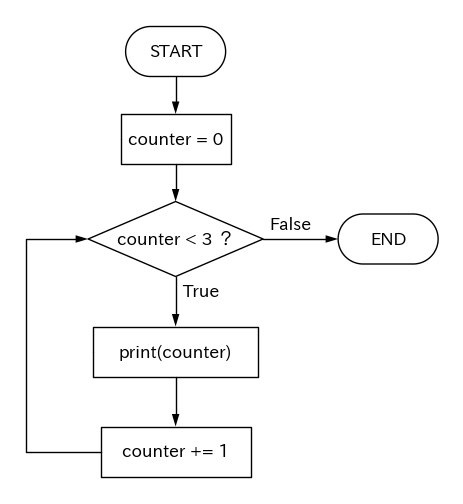

In [423]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    flow.Box(w=2.2, h=1).label(r'counter = 0').drop('S')
    flow.Arrow().down(sd.unit/4)
    
    d = flow.Decision(w=3.5, h=1.5, S='True', E='False'
                     ).label('counter < 3 ？').drop('E')

    flow.Arrow().right(sd.unit/2).at(d.E)
    flow.Start(w=2, h=1).label('END').anchor('W')
    
    flow.Arrow().down(sd.unit/3).at(d.S)
    flow.Box(w=3.3, h=1).label('print(counter)')
    flow.Arrow().down(sd.unit/3)
    b = flow.Box(w=3., h=1).label('counter += 1')

    flow.Wire('c', k=-1.5, arrow='->').linewidth(1).at(b.W).to(d.W)

この図から，最後の`counter+=1`がなければ無限ループに陥ってしまうことが分かると思う。また，`for`ループ同様，菱形で`if`文が裏で働いていることが分かる。一方で，`if`文の判断で次の点で異なる。
* `while`ループ：条件が`True`の場合にループ処理は継続し，`False`の場合に終了する。
* `for`ループ：条件が`False`の場合にループ処理は継続し，`True`の場合に終了する。

`while`ループは`if`文に基づいていることが分かった訳だが，このことから，`if`文で使った`else`も`while`ループでも使えたとしても不思議ではないだろう。実際，使うことができる。上の例に`else`を使ってみよう。

In [315]:
count = 0

while count < 3:  #1
    
    print(count)
    
    count += 1
    
else:             #2
    print('無事終了(^^)')

0
1
2
無事終了(^^)


4回目のループの初めに`count<3`は`False`を返したので，`else`に進みメッセージを表示している。このコードを見ると，`if`文と構造が非常に似ていることが分かる。
* `#1`：条件の真偽値を確認する。`True`であれば，続くコードを実行する。
* `#2`：条件が`False`の場合に実行する。

フローチャートを使うと，次のように表すことができる。

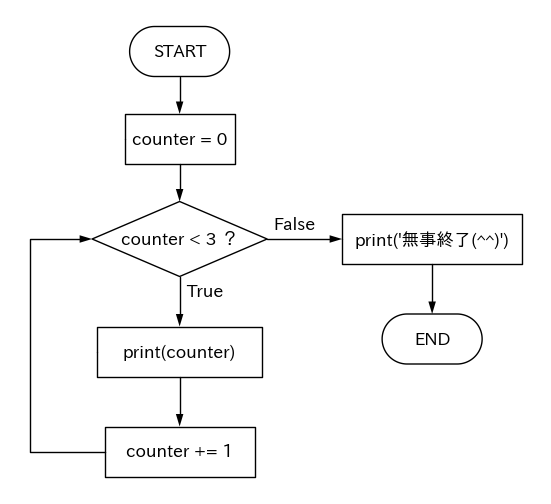

In [426]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    flow.Box(w=2.2, h=1).label(r'counter = 0').drop('S')
    flow.Arrow().down(sd.unit/4)
    
    d = flow.Decision(w=3.5, h=1.5, S='True', E='False'
                     ).label('counter < 3 ？').drop('E')

    flow.Arrow().right(sd.unit/2).at(d.E)
    flow.Box(w=3.6, h=1).label("print('無事終了(^^)')").drop('S')
    flow.Arrow().down(sd.unit/3)
    flow.Start(w=2, h=1).label('END')
    
    flow.Arrow().down(sd.unit/3).at(d.S)
    flow.Box(w=3.3, h=1).label('print(counter)')
    flow.Arrow().down(sd.unit/3)
    b = flow.Box(w=3., h=1).label('counter += 1')
    
    flow.Wire('c', k=-1.5, arrow='->').linewidth(1).at(b.W).to(d.W)

上のフローチャートと比べると，菱形枠と`END`の間に`print('無事終了(^^)')`が追加されている。

### 近似を考える

`while`ループと`for`ループをどう使い分けすれば良いだろうか。扱うデータ構造と目的が判断基準となるだろう。リストやタプルのようなイタラブルが用意できるのであれば，`for`ループの実行速度が断然速い。この場合はループの回数が事前に分かっているケースとなるが，分からない場合もあり得る。そういう場合は`while`ループを使うべきである。このセクションでは，その例を2つ取り上げる。

#### 壁からの距離

壁から１メートル離れて立ち，毎回壁までの半分の距離を進むとしよう。壁までの距離を変数`distance`で表すと，初期値は`1`となる。またループをストップする距離を`0.001`（1mm）とする。`while`ループを書いて距離の推移を表示してみよう。

In [316]:
distance = 1                   #1

while distance > 0.001:        #2
    
    print(distance)            #3
    
    distance -= distance/2     #4

else:
    print(f'残りの距離は{distance*1000}mmです。')  #5

1
0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125
残りの距離は0.9765625mmです。


＜コードの説明＞
* 1行目
    * `distance`はカウンターの役割を果たす。初期値は`1`。
* 2行目
    * `distance>0.001`が条件であり，この条件が`False`，即ち，`distance<=0.001`になる手前までループが続く。
* 1回目のループ
    * 2行目：`distance`の値は`1`なので`distance>0.001`は`True`を返す。条件が満たされたのでループの内容を実行する。
    * 3行目：`print()`関数を使い変数`distance`の値を表示する。
    * 4行目：`distance`は`0.5`に減少し，この時点で`distance=0.5`にアップデートされる。
* 2回目のループ
    * 2行目：`distance`の値は`0.5`なので`distance>0.001`は`True`を返す。条件が満たされたのでループの内容を実行する。
    * 3行目：`print()`関数を使い変数`distance`の値を表示する。
    * 4行目：`distance`は`0.25`に減少し，この時点で`distance=0.25`にアップデートされる。
* 3回目以降のループ
    * 同様の計算が行われ，`distance<=0.001`が成立するとループは停止する。
    * ループ停止後に`#5`が実行される。

ループ終了時の`distance`の値は`0.001`よりも小さいことが確認できる。もちろん，条件にある`0.001`を変えることにより，どこまで壁に近づけれるかを設定できる。もっと小さくすれば，より壁に近づくことができる。

上の`while`ループは何回ループ計算をしたかは分からない。次のコードはそれを確認するために変数`counter`を追加している。

In [317]:
distance = 1
counter = 0

while distance > 1e-100:
    
    distance -= distance/2
    
    counter += 1
    
else:
    print(f'残りの距離は{distance}です。')
    print(f'{counter}回ループ計算しました🚀')

残りの距離は5.714936956411375e-101です。
333回ループ計算しました🚀


ここで`1e-100`は$10^{-100}$である。

```{note}
科学的表記（scientific notation）は次のような書き方となる。
* `1.5e0` = $1.5$
* `1.5e10` = $1.5\times 10^{10}$
* `-8e100` = $-8\times 10^{100}$
* `1e-100` = $10^{-100}$
* `-5.2e-10` = $-5.2\times 10^{-10}$
```

#### 平方根の近似

近似値の例として，紀元前数千年前のメソポタミア地域で発達したバビロン数学の例を考えよう。数字`s`の平方根（$\sqrt{s}$）は次式で近似されることが知られている。

$$
x_{n+1}=\dfrac{1}{2}\left(x_n+\frac{s}{x_n}\right),
\quad \text{初期値 }x_0,
\quad n=0,1,2,3,..N
$$

この式は数学で学ぶ漸化式の形となっている。$N$は任意の計算回数。$N$が大きくれば，それだけ誤差が小さくなり，$x_n$は真の値に近づいていく。実際にコードを書いてみよう。

In [318]:
def sqrt_approx(s, x0):  #1
    
    x = x0               #2
    
    while abs((x * x) - s) > 0.0001: #3
        
        x = (x + (s / x)) / 2        #4
        
        print(x)                     #5

＜コードの説明＞
* `#1`：引数
    * `s`：平方根を計算する対象の数字
    * `x0`：漸化式の初期値
* `#2`：初期値`x0`を`x`に割り当てる。
* `#3`：`abs()`は絶対値を返す組込み関数である。引数の`x*x-s`は近似の誤差であり，誤差が`0.0001`よりも大きい間は漸化式の計算がおこなわれる。
* `#4`：漸化式
    * 右辺は漸化式の右辺を表している。最初のループでは，$x_n$に`x0`の値が代入される。その結果が左辺の`x`に割り当てられ（$x_{n+1}$に対応している），それと同時に`#2`の`x=x0`は無効となる。
    * その後のループも同様の計算が続く。
* `#5`：`x`の値を表示する。

ではコードを実行してみるが，`100`を初期値として`4`の平方根を計算してみよう。

In [53]:
sqrt_approx(4,100)

50.02
25.04998400639744
12.604832373535453
6.4610854923746075
3.5400882555851294
2.335001794270127
2.0240312882070577
2.0001426615330145
2.000000005087715


紀元前に使われていたアルゴリズムとは信じられない程，真の値`2`への収束が速いことが伺える。

* 上のコードで誤差は`0.0001`以下になっているが，この閾値を少しでも下回ると計算はストップする。より正確な近似を得るためにはより低い閾値を設定する必要がある。しかし，小さな誤差はより長い計算時間が必要になる。即ち，精度と計算速度にはトレード・オフが存在するということである。
* `Python`は広く科学計算に使われ，（様々なパッケージを使うことにより）簡単に方程式の解を求めることができる。しかし，全てのケースで真の解そのものを計算できるとは限らない。この例の様に解を近似値として求める場合が多くあり，複雑な方程式であればなおさらである。計算過程で誤差が減少し解に収束していくことになるが，その収束速度が速い解法がより良いアルゴリズムだと言えるだろう。

### `if`文と`continue`

次の`while`ループを考えてみよう。

In [427]:
counter = 0

while counter < 3:  #1

    counter += 1    #2
    
    print(counter)  #3

1
2
3


このコードは最初の`while`ループの例と殆ど同じであり，異なるのは次の点だけである。
* `#2`と`#3`：`print(counter)`と`counter+=1`の位置を入れ替えている。

この２つの違いにより，最初に表示される数字は`0`ではなく`1`となり，最後に表示される数字は`2`ではなく`3`となっている。この違いは，フローチャートで示すとより分かりやすいのではないだろうか。

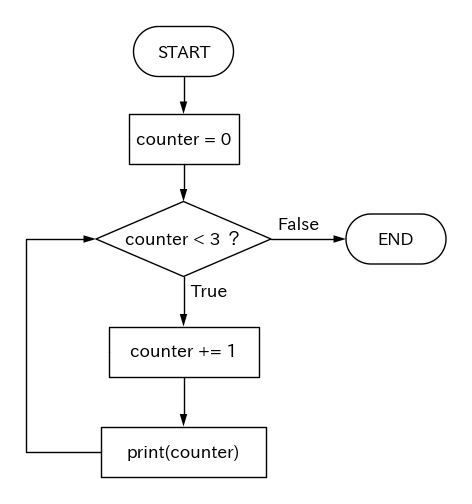

In [429]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    flow.Box(w=2.2, h=1).label(r'counter = 0').drop('S')
    flow.Arrow().down(sd.unit/4)
    
    d = flow.Decision(w=3.5, h=1.5, S='True', E='False'
                     ).label('counter < 3 ？').drop('E')

    flow.Arrow().right(sd.unit/2).at(d.E)
    flow.Start(w=2, h=1).label('END').anchor('W')
    
    flow.Arrow().down(sd.unit/3).at(d.S)
    flow.Box(w=3., h=1).label('counter += 1')
    flow.Arrow().down(sd.unit/3)
    b = flow.Box(w=3.3, h=1).label('print(counter)')
    
    flow.Wire('c', k=-1.5, arrow='->').linewidth(1).at(b.W).to(d.W)

この例に基づいて，`1`から`5`までの数字を`3`を飛ばして`1`，`2`，`4`，`5`を表示するとしよう。その場合に重宝するのが`if`文と`continue`（対象コードの実行を飛ばすコード）の組み合わせである。まず，フローチャートで表してみよう。

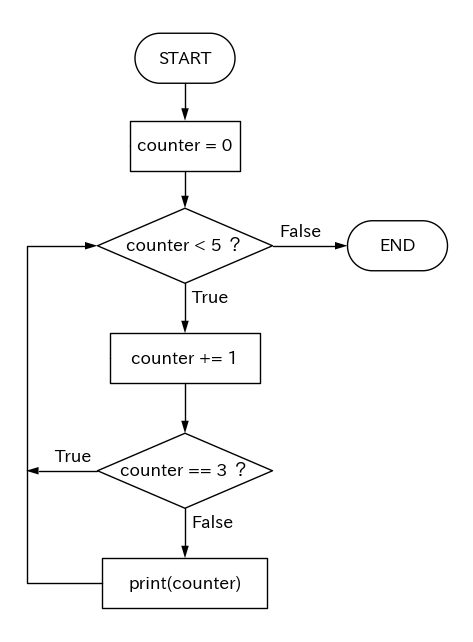

In [433]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    flow.Box(w=2.2, h=1).label(r'counter = 0').drop('S')
    flow.Arrow().down(sd.unit/4)
    
    d1 = flow.Decision(w=3.5, h=1.5, S='True', E='False'
                     ).label('counter < 5 ？').drop('E')

    flow.Arrow().right(sd.unit/2).at(d.E)
    flow.Start(w=2, h=1).label('END').anchor('W')
    
    flow.Arrow().down(sd.unit/3).at(d.S)
    flow.Box(w=3., h=1).label('counter += 1')
    
    flow.Arrow().down(sd.unit/3)
    d2 = flow.Decision(w=3.5, h=1.5, S='False', W='True'
                 ).label('counter == 3 ？')
    flow.Arrow().left(sd.unit/2.1).at(d2.W)

    flow.Arrow().down(sd.unit/3).at(d2.S)
    b = flow.Box(w=3.3, h=1).label('print(counter)')
    
    flow.Wire('c', k=-1.5, arrow='->').linewidth(1).at(b.W).to(d1.W)

上のフローチャートと異なる点は，下の菱形が追加されていることだけであり，その菱形を`if`文で捉えることができる。更に，下の菱形から上の菱形への矢印（`3`の表示を飛ばす）を`continue`で実行することになる。コードを書いてみよう。

In [319]:
counter = 0

while counter < 5:    #1

    counter += 1      #2
    
    if counter == 3:  #3
        
        continue      #4
    
    print(counter)    #5

1
2
4
5


＜`while`ループの説明＞
* `#1`：`counter<5`が`True`である限り`#2`に進む。
* `#2`：`counter`の値が`1`増える。
* `#3`：
    * `counter==3`が`False`の場合，`#5`に進む。
    * `counter==3`が`True`の場合，`#4`に進む。
* `#4`：`continue`が実行されると，`#1`に戻る。即ち，`#5`は飛ばされる。
* `#5`：`counter`の値を表示する。

このように`while`ループでコードをスキップする場合に`continue`を使う。

```{warning}
1. `#2`を`#4`の下に置くと，`counter`の値は`3`でストップして無限ループになってしまうので注意しよう。
1. `#5`を`#3`の上に置くと，`3`も表示されるので注意しよう。
```

### `if`文と`break`

`while`ループでは
```
while True:
    ＜実行コード＞
```
と書くと無限ループになってしまう。フローチャートで表現すると次のようになる。

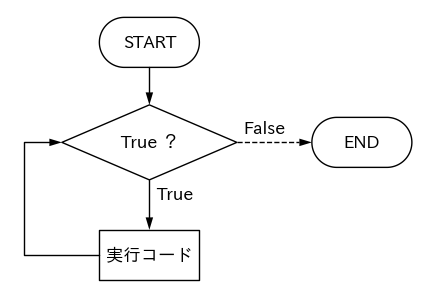

In [437]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    
    d = flow.Decision(w=3.5, h=1.5, S='True', E='False'
                     ).label('True ？')

    flow.Arrow(ls='dashed').right(sd.unit/2).at(d.E)
    flow.Start(w=2, h=1).label('END').anchor('W')
    
    flow.Arrow().down(sd.unit/3).at(d.S)
    b = flow.Box(w=2, h=1).label('実行コード')
    
    flow.Wire('c', k=-1.5, arrow='->').linewidth(1).at(b.W).to(d.W)

菱形の中は`True`なので，必ず`True`の矢印の方向に沿ってコードは実行される。`False`も書いてあるが，そちらの矢印に決して進むことはない。

一方で，`while True:`と書く`while`ループでも，途中で処理を終了させる方法がある。それが`if`文と`break`（ループを中断するコード）を組み合わせる方法である。フローチャートでは次のようになる。

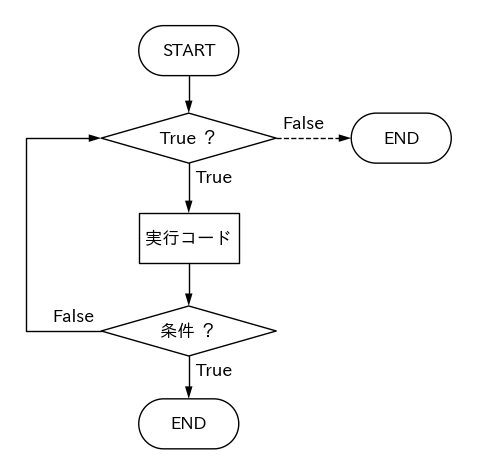

In [442]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)
    
    d1 = flow.Decision(w=3.5, h=1, S='True', E='False'
                     ).label('True ？')

    flow.Arrow(ls='dashed').right(sd.unit/2).at(d1.E)
    flow.Start(w=2, h=1).label('END').anchor('W')
    
    flow.Arrow().down(sd.unit/3).at(d1.S)
    b = flow.Box(w=2, h=1).label('実行コード')
    
    flow.Arrow().down(sd.unit/3.5)
    d2 = flow.Decision(w=3.5, h=1, S='True', W='False'
                 ).label('条件 ？')
    
    flow.Arrow().down(sd.unit/3.5)
    flow.Start(w=2, h=1).label('END')
        
    flow.Wire('c', k=-1.5, arrow='->').linewidth(1).at(d2.W).to(d1.W)

上のフローチャートと異なるのは，下の菱形（`条件？`）を追加することにより，`while`ループは維持するとともに`END`への矢印を追加した点である。

例を使って，この考えをコードに落とし込んでみよう。

In [344]:
counter = 0          #1

while True:          #2
    
    print(counter)   #3
    
    counter += 1     #4

    if counter > 2:  #5
        
        break        #6

0
1
2


＜`while`ループの説明＞
* `#1`：カウンター変数の初期化（`0`に設定する）
* `#2`：条件は`True`なので，必ず`#3`以下のコードを実行する。
* `#3`：`counter`を表示する。
* `#4`：`counter`の値に`1`を加える。
* `#5`：
    * `counter>2`が`False`の場合は`#2`に戻る。
    * `counter>2`が`True`の場合は`#6`に進む。
* `#6`：`break`を実行しループは終了となる。

フローチャートでは次のようになる。

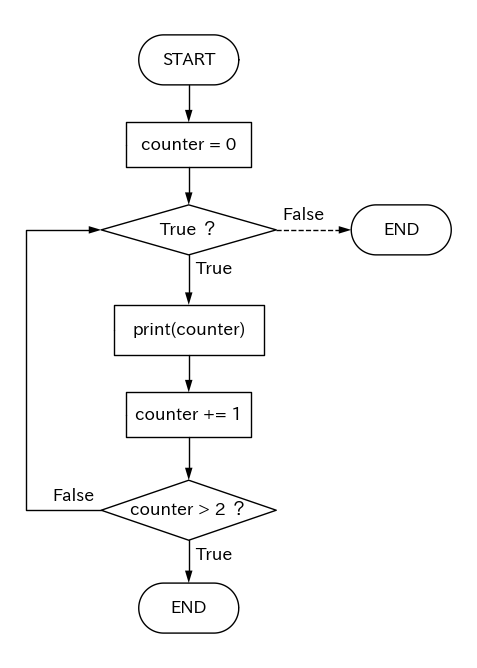

In [446]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)

    b = flow.Box(w=2.5, h=0.9).label('counter = 0')
    flow.Arrow().down(sd.unit/4)
    
    d1 = flow.Decision(w=3.5, h=1, S='True', E='False'
                     ).label('True ？')

    flow.Arrow(ls='dashed').right(sd.unit/2).at(d1.E)
    flow.Start(w=2, h=1).label('END').anchor('W')
    
    flow.Arrow().down(sd.unit/3).at(d1.S)
    b = flow.Box(w=3, h=1).label("print(counter)")

    flow.Arrow().down(sd.unit/4)    
    b = flow.Box(w=2.5, h=0.9).label('counter += 1')

    flow.Arrow().down(sd.unit/3.5)
    d2 = flow.Decision(w=3.5, h=1.2, S='True', W='False'
                 ).label('counter > 2 ？')
    
    flow.Arrow().down(sd.unit/3.5)
    flow.Start(w=2, h=1).label('END')
        
    flow.Wire('c', k=-1.5, arrow='->').linewidth(1).at(d2.W).to(d1.W)

上のコードの`#4`〜`#6`を少し書き換えて，次のようにしても同じ結果が返される。

In [376]:
counter = 0            #1

while True:            #2
    
    print(counter)     #3

    if counter < 2:    #4

        counter += 1   #5

    else:              #6

        break          #7

0
1
2


上のコードの方が可読性は高いように感じないだろうか。違いを理解するために，フローチャートを書いてみよう。

### `continue`と`break`

`continue`と`break`を一緒に使うことも可能である。`1`から`5`までの数字で`3`を飛ばして表示する次の例を考えよう。

In [380]:
counter = 0

while True:           #1

    counter += 1      #2
    
    if counter == 3:  #3
        continue      #4
        
    print(counter)    #5
    
    if counter > 4:   #6
        break         #7

1
2
4
5


＜`while`ループの説明＞
* `#1`：条件は`True`なので，必ず`#2`に進む。
* `#2`：`counter`の値に`1`を加える。
* `#3`：
    * `counter==3`が`False`の場合，`#5`に進む。
    * `counter==3`が`True`の場合，`#4`に進む。
* `#4`：`continue`が実行されると，`#1`に戻る。即ち，`#5`以下は飛ばされる。
* `#5`：`counter`の値を表示する。
* `#6`：
    * `counter>4`が`False`の場合は`#2`に戻る。
    * `counter>4`が`True`の場合は`#7`に進む。
* `#7`：
    * `break`を実行しループを終了する。

`continue`と`break`それぞれに`if`文が必要となる。

フローチャートを使うと次のように表すことができる。

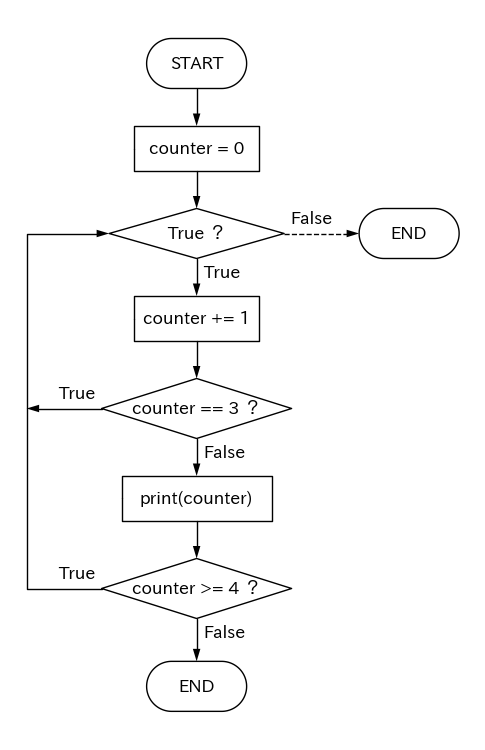

In [450]:
with schemdraw.Drawing() as sd:
    flow.Start(w=2, h=1).label('START')
    flow.Arrow().down(sd.unit/4)

    b = flow.Box(w=2.5, h=0.9).label('counter = 0')
    flow.Arrow().down(sd.unit/4)
    
    d1 = flow.Decision(w=3.5, h=1, S='True', E='False'
                      ).label('True ？')

    flow.Arrow(ls='dashed').right(sd.unit/2).at(d1.E)
    flow.Start(w=2, h=1).label('END').anchor('W')

    flow.Arrow().down(sd.unit/4).at(d1.S)  
    b = flow.Box(w=2.5, h=0.9).label('counter += 1')

    flow.Arrow().down(sd.unit/4)
    d2 = flow.Decision(w=3.8, h=1.2, S='False', W='True'
                      ).label('counter == 3 ？')
    flow.Arrow().left(sd.unit/2).at(d2.W)
    
    flow.Arrow().down(sd.unit/4).at(d2.S)
    flow.Box(w=3, h=0.9).label("print(counter)")

    flow.Arrow().down(sd.unit/4)
    d3 = flow.Decision(w=3.8, h=1.2, S='False', W='True'
                      ).label('counter >= 4 ？')

    
    flow.Arrow().down(sd.unit/3.5).at(d3.S)
    flow.Start(w=2, h=1).label('END')

    flow.Wire('c', k=-1.5, arrow='->').linewidth(1).at(d3.W).to(d1.W)